# Hypothesis Testing
- ### T-Tests
- ### Chi-Squared Tests

**Importing Libraries**

In [1]:
import numpy as np
np.random.seed(42)
from scipy import stats
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt


##  T-Tests

### T-test with one sample mean

Students that where taught with a new studing method recived a mean test score of 74.6 and the regular student test score average is 68.
Do the new study students have a significantly diffrent mean test score that the regular student population.

Null Hypothosis: New Studing mean = 68
Alternative Hypothosis: New Studing mean != 68

We use a sample mean from the population to carry out the t-test

in this example we reject the null hypothisis since the p value is less than 0.05.
(if less than 0.05 they are diffrent from each other)

Therefore, we should reject the null hypothesis and conclude that students using the new method to learn physics do have a statistically significant mean physics test score compared to the entire population of physics students.

In [20]:
# Creating scores data
class_scores = stats.norm.rvs(loc=74.6, scale=12.3, size=50)

# Doing a one sample t-test
stats.ttest_1samp(class_scores, 68)

Ttest_1sampResult(statistic=2.356178419606804, pvalue=0.022507992110008868)

### T-test two sample means

cardio-based program: mean=69 bpm, std=6.5 bpm
yoga-based program: mean=71 bpm, std=7.3 bpm

Null Hypothosis: cardio-based program = yoga-based program
Alternative Hypothosis: cardio-based program != yoga-based program

We use a sample mean from the population to carry out the t-test

in this case we reject the null hypothosis since the p value is less than 0.05

In [21]:
# Generate the random variables with the specified mean, std, and sample size
rvs1 = stats.norm.rvs(loc=69, scale=6.5,size=500)
rvs2 = stats.norm.rvs(loc=71, scale=7.3, size=500)

# Calculate the t statistic for these two sample populations
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-6.154446618124405, pvalue=1.08959765379466e-09)

### The Normal Distribution

Text(0.5, 1.0, 'The normal distribution')

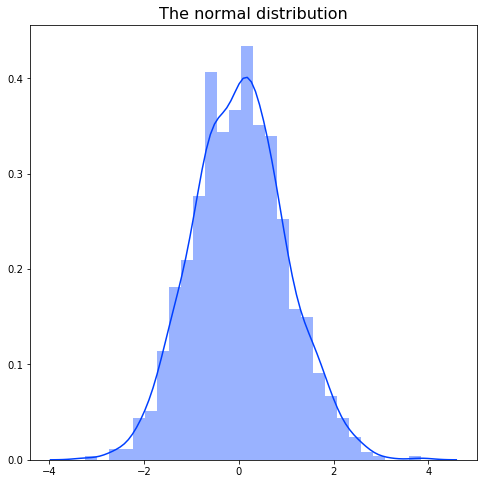

In [23]:
# The mean of a normal distribution can be any value
# (we're using 0 for plotting nicely and to see the symmetry)
mean = 0

# The width of the normal distribution is set by the standard deviation
sigma = 1 

# Create a sample drawn from the normal distribution
sample = np.random.normal(loc=mean, scale=sigma, size=1000)

# The 'seaborn' style sheet has nice defaults
plt.style.use('seaborn-bright')

# Create the fig and axes object and plot
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.distplot(sample)
ax.set_title('The normal distribution', fontsize=16)

# The T-distribution

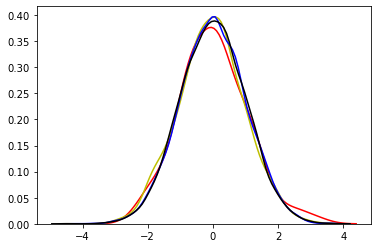

In [24]:
# Create the t-distributions
t_df10 = np.random.standard_t(df=10, size=100)
t_df100 = np.random.standard_t(df=100, size=1000)
t_df1000 = np.random.standard_t(df=1000, size=10000)

# Create the normal distribution
s = np.random.normal(size=10000)

# Create the figure and axes objects and plots
fig, ax = plt.subplots(1)

# Plot t-distributions
ax = sns.kdeplot(t_df10, color='r');
ax = sns.kdeplot(t_df100, color='y');
ax = sns.kdeplot(t_df1000, color='b');

# Plot normal distributions
ax = sns.kdeplot(s, color='k');

### T-test Manual and with Scipy

**Scipy**

In [25]:
# Generate the random test scores with the specified mean, std, and sample size
rvs = stats.norm.rvs(loc=69, scale=6.5, size=50, random_state=42)

# Display the test scores, as a check
rvs

# Check the sample mean and std
print('The mean of the sample: ', rvs.mean())
print('The standard deviation of the sample: ', rvs.std())

# Calculate the t value using the ttest_1samp 
stats.ttest_1samp(rvs, popmean=72)

The mean of the sample:  67.53441961583509
The standard deviation of the sample:  6.00785209617076


Ttest_1sampResult(statistic=-5.2030346601039055, pvalue=3.841987344207577e-06)

**Manual**

In [26]:
# Calculate the t-value
tstatistic = (67.53-72)/(6.01/np.sqrt(50))
print('The t-statistic is: ', tstatistic)

The t-statistic is:  -5.259180219473988


## chi-square tests

### chi-squared and Dice roll (random number generator)

Null Hypothisis: The dice are rigged
Alternative Hypothisis: The dice are not rigged


In [2]:
# Create the array for each die value
# These are randomly generated values
a1 = [13, 7, 10, 5, 13]
a2 = [5, 7, 4, 12, 9]
a3 = [5, 9, 14, 0, 10]
a4 = [12, 13, 8, 7, 7]
a5 = [7, 10, 9, 13, 6]
a6 = [8, 4, 5, 13, 5]

# Combine them into a (6,5) array
dice = np.array([a1, a2, a3, a4, a5, a6])

from the chi contingency table or even the p value we can conclude that we
fail to reject the null hypothesis

In [3]:
stat, p, dof, expected = chi2_contingency(dice, correction=False)

# Print out the stats in a nice format
print('Expected values: \n ', expected.round(2))
print('The degrees of freedom: ', dof)
print(f'The chi square statistics is: {stat:.3f}')
print(f'The p value is: {p:.6f}')

Expected values: 
  [[9.6 9.6 9.6 9.6 9.6]
 [7.4 7.4 7.4 7.4 7.4]
 [7.6 7.6 7.6 7.6 7.6]
 [9.4 9.4 9.4 9.4 9.4]
 [9.  9.  9.  9.  9. ]
 [7.  7.  7.  7.  7. ]]
The degrees of freedom:  20
The chi square statistics is: 40.375
The p value is: 0.004477


### Chi-squared test comparing multiple features

In [5]:
# Create the table using as a NumPy array
table = np.array([[200, 290], [400, 910]])

# Print out the table to double-check
print('Contingency table: \n', table)

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(table, correction=False)

# Print out the stats in a nice format
print('Expected values: \n ', expected.round(2))
print(f'The chi square statistics is: {stat:.3f}')
print(f'The p value is: {p:.6f}')

Contingency table: 
 [[200 290]
 [400 910]]
Expected values: 
  [[163.33 326.67]
 [436.67 873.33]]
The chi square statistics is: 16.965
The p value is: 0.000038
